<a href="https://colab.research.google.com/github/dnguyet06/B-i-t-p-AI/blob/main/bafi_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#input
rating=ctrl.Antecedent(np.arange(0,5,0.1),'rating')
sales=ctrl.Antecedent(np.arange(0,3.1,0.1),'sales')
profit=ctrl.Antecedent(np.arange(0,3.1,0.1),'profit')
event=ctrl.Antecedent(np.arange(0,3.1,0.1),'event')
competitor_discount=ctrl.Antecedent(np.arange(0,3.1,0.1),'competitor_discount')
#output
discount=ctrl.Consequent(np.arange(0,71,0.1),'discount')

In [ ]:
rating['l']=fuzz.trimf(rating.universe,[0,0,4])
rating['m']=fuzz.trimf(rating.universe,[3.5,4,4.5])
rating['h']=fuzz.trimf(rating.universe,[4,4.5,4.5])
sales['l']=fuzz.trimf(sales.universe,[0,0.5,1])
sales['m']=fuzz.trimf(sales.universe,[0.9,1,1.8])
sales['h']=fuzz.trimf(sales.universe,[1.5,2,3])
profit['l']=fuzz.trimf(profit.universe,[0,0,1])
profit['m']=fuzz.trimf(profit.universe,[0.3,1,2])
profit['h']=fuzz.trimf(profit.universe,[1.5,2,2])
event['n']=fuzz.trimf(event.universe,[0,0,1.5])
event['m']=fuzz.trimf(event.universe,[0.9,2,2.5])
event['h']=fuzz.trimf(event.universe,[2,2.5,3])
competitor_discount['l']=fuzz.trimf(competitor_discount.universe,[0,0,1])
competitor_discount['m']=fuzz.trimf(competitor_discount.universe,[0.5,1,1.5])
competitor_discount['h']=fuzz.trimf(competitor_discount.universe,[1.5,2,2.5])
discount['vl']=fuzz.trimf(discount.universe,[0,0,5])
discount['l']=fuzz.trimf(discount.universe,[3,6,10])
discount['m']=fuzz.trimf(discount.universe,[9,15,20])
discount['h']=fuzz.trimf(discount.universe,[15,20,40])
discount['vh']=fuzz.trimf(discount.universe,[30,40,70])

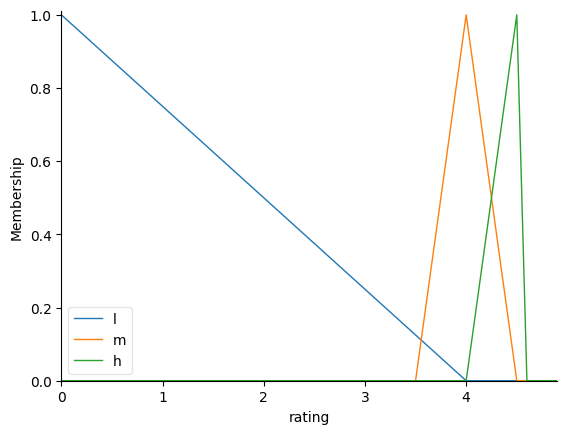

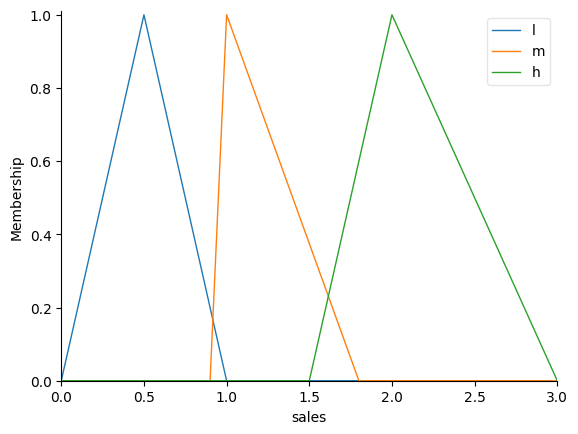

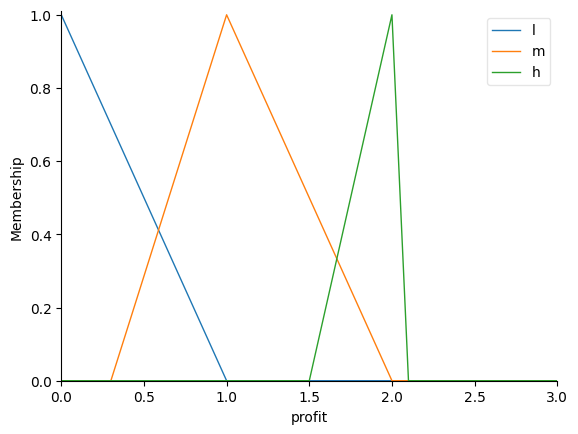

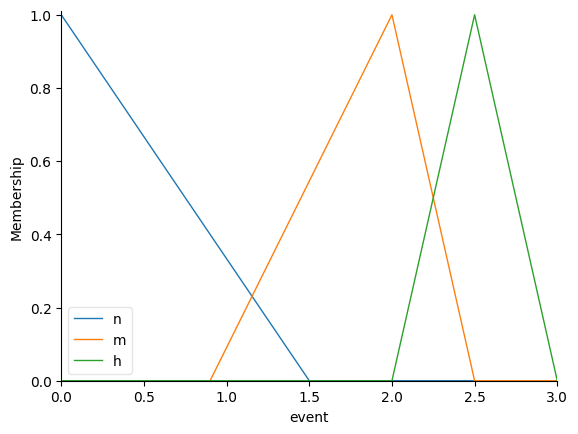

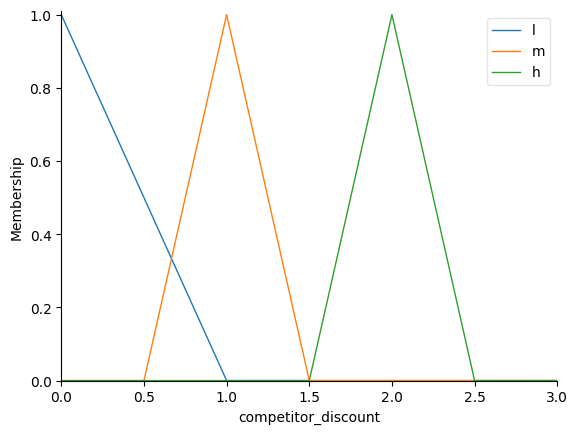

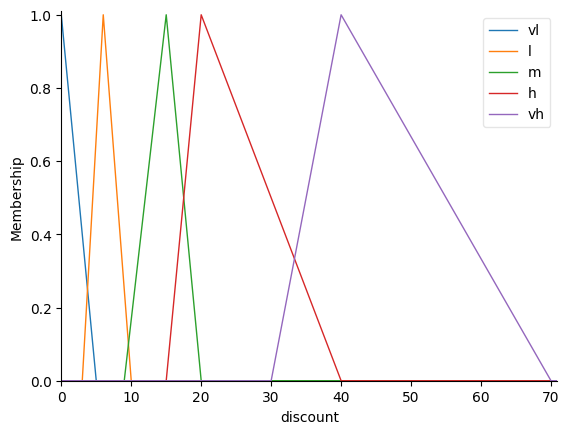

In [ ]:
rating.view()
sales.view()
profit.view()
event.view()
competitor_discount.view()
discount.view()

In [ ]:
rule1=ctrl.Rule(rating['h']&sales['h']&profit['h'],discount['vl'])
rule2=ctrl.Rule(rating['l']&sales['l']&profit['h'],discount['h'])
rule3=ctrl.Rule(event['h']&competitor_discount['h'],discount['vh'])
rule4=ctrl.Rule(rating['m']&sales['m']&profit['m'],discount['m'])
rule5=ctrl.Rule(competitor_discount['l']&profit['l']&sales['h'],discount['vl'])
rule6=ctrl.Rule(rating['l']&event['n'],discount['vh'])
rule7=ctrl.Rule(sales['l']&profit['l'],discount['vh'])


38.0942975961302


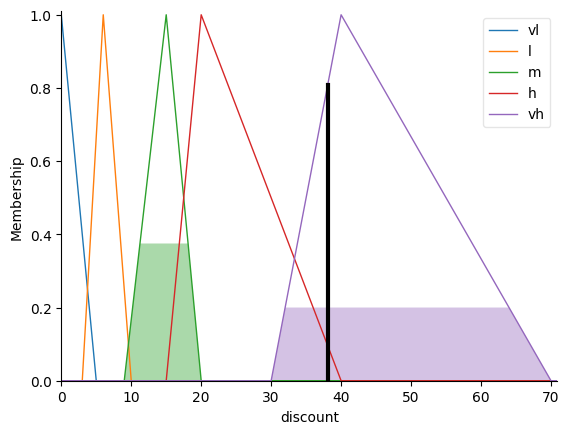

In [ ]:
check=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7])
sim=ctrl.ControlSystemSimulation(check)
sim.input['rating']=4.3
sim.input['sales']=1.5
sim.input['profit']=0.6
sim.input['event']=2.5
sim.input['competitor_discount']=2.4
sim.compute()
print(sim.output['discount'])
discount.view(sim)